In [1]:
%config Completer.use_jedi = False

In [2]:
from utils import *
from parallel import to_run

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool

In [4]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

In [5]:
from ising_model import Simulate_MH

In [6]:
%%timeit
to_run(1, 1_000_000, 10, 32, 10, np.random.randint(10000000))

329 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
to_run(1, 1_000_000, 0.1, 32, 10, np.random.randint(10000000))

307 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
Ms, Es = to_run(1, 500_000, 10, 32, 10, 45)

In [9]:
Ms

array([ 12,   4,   8, ..., -74, -78, -66])

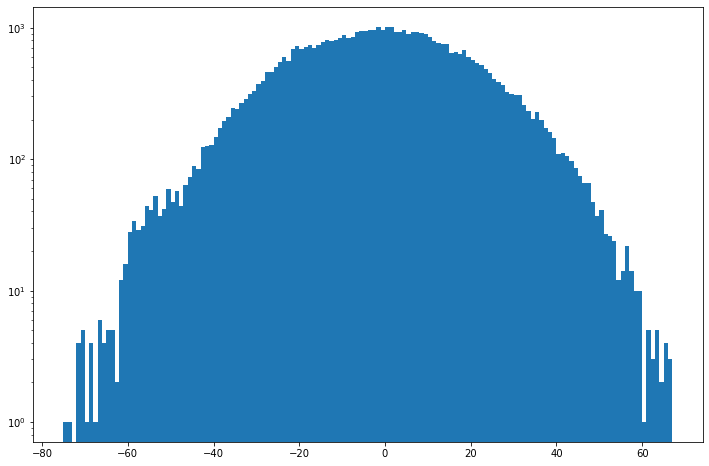

In [10]:
Mss = Ms//2
plt.hist(Mss, bins=(Mss.max()-Mss.min()), range=(Mss.min(), Mss.max()), log=True);

In [11]:
len(Ms)

50000

In [12]:
pool = Pool(7)

In [13]:
runs = 100
Ts = np.linspace(0,6,runs+1)[1:]
result = pool.starmap(to_run, 
        np.stack((np.arange(runs),
                  [10_000_000]*runs, # steps
                  Ts, # temperature
                  [32]*runs, # lattice size
                  [10]*runs, # frequency
                  np.random.randint(0,1000000, runs)), axis=1)
    )

In [16]:
meanMs = []
errMs = []
for i,(Ms, Es) in enumerate(result):
    mean, err = mean_with_err(Ms[-Ms.shape[0]//3:])
    meanMs.append(mean)
    errMs.append(err)

<ErrorbarContainer object of 3 artists>

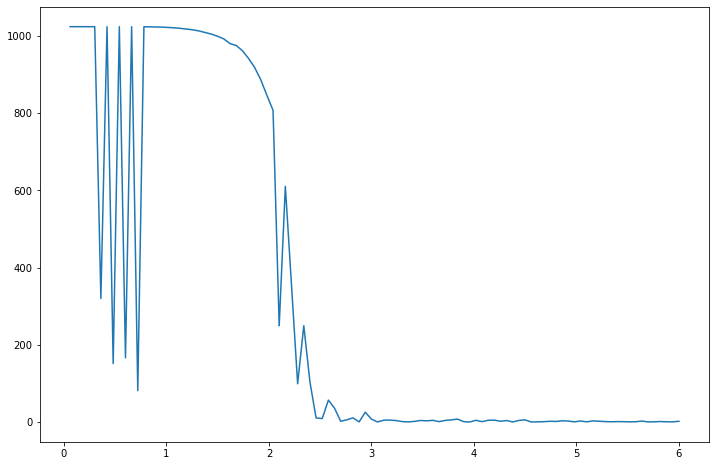

In [17]:
plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
# for t, m in zip(Ts, np.abs(meanMs)):
#     plt.gca().annotate(f'{t:0.2f}', (t,m))

-75.99894527472527
1022.3768534065936
882.5779731868132
1.3013745054945058
1.9174492307692306
0.6913013186813187
0.2534738461538461
0.4389457142857143
-1.108323296703297
-0.2769358241758242
-0.6154857142857144
0.050426373626373616
0.03948197802197803
-0.7627142857142858
0.41276329670329664
0.6212892307692306
-0.42940131868131864
0.32092483516483516
0.8835804395604394
0.6086885714285715


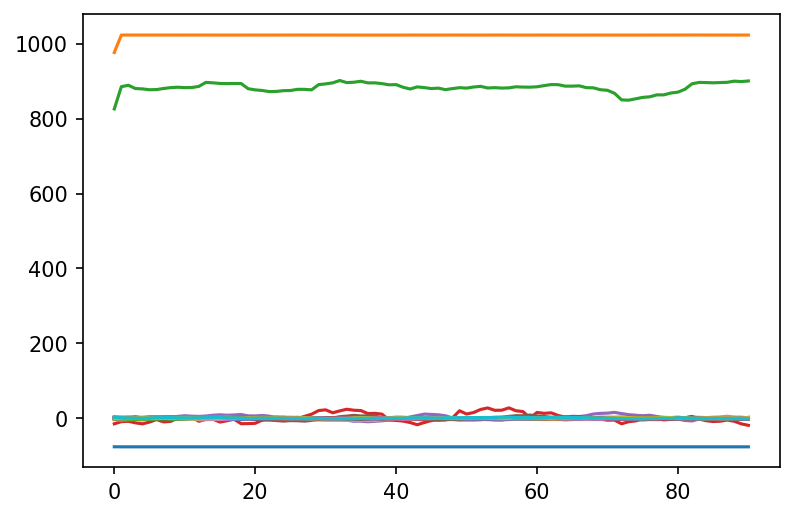

In [15]:
sp = 1

for i,(Ms, Es) in enumerate(result):
#     print(i, end="")
    mean, err = moving_mean_err(Ms, 10**5, stride=10000)
    print(mean.mean())
    plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", label=f"{i}")
# plt.legend()

In [6]:
engine.FLIPS

0

In [ ]:
np.